# Digits Recognization with non-linear SVMs

## Import nescessary Libraries and Split data into training sets and testinc sets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test datasets
df_train = pd.read_csv('Datasets/train.csv')
df_test = pd.read_csv('Datasets/test.csv')

# Spliting train data into X_train, Y_train
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

X_train.head()




/var/folders/68/zyhcqh4544qf2tw0x_bmcwxr0000gn/T/ipykernel_16320/2620013710.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Show out lable
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
# Normalize inputs
X_train = X_train / 255.0
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:


def plot_digits(X, Y):
    for i in range(16):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X_train, Y_train)

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg')  # Set the backend to Qt5


# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_train]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_train = np.array(Y_train)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA
pca = PCA(n_components=3)  # Project to 3 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flattened)

# Plot the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(Y_train):
    ax.scatter(X_train_pca[Y_train == label, 0],
               X_train_pca[Y_train == label, 1],
               X_train_pca[Y_train == label, 2],
               label=str(label),
               alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Add interactive functionality
ax.mouse_init()  # Allow mouse interaction

# You can now interactively zoom in/out and rotate the plot using your mouse.
plt.show()


In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Filter data points with labels 2 and 3
X_filtered = X_train[np.logical_or(Y_train == 2, Y_train == 3)]
Y_filtered = Y_train[np.logical_or(Y_train == 2, Y_train == 3)]

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_filtered]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_filtered = np.array(Y_filtered)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA with 3 components
pca = PCA(n_components=3)  # Project to 3 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flattened)

# Plot the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


## Hyperplane between digit 2 and 3

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Filter data points with labels 2 and 3
X_filtered = X_train[np.logical_or(Y_train == 2, Y_train == 3)]
Y_filtered = Y_train[np.logical_or(Y_train == 2, Y_train == 3)]

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_filtered]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_filtered = np.array(Y_filtered)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_flattened)

# Fit SVM to separate data points with labels 2 and 3
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_pca, Y_filtered)

# Create meshgrid for plotting the hyperplane
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.5)

# Plot hyperplane
ax.plot_surface(xx, yy, zz, color='b', alpha=0.3)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


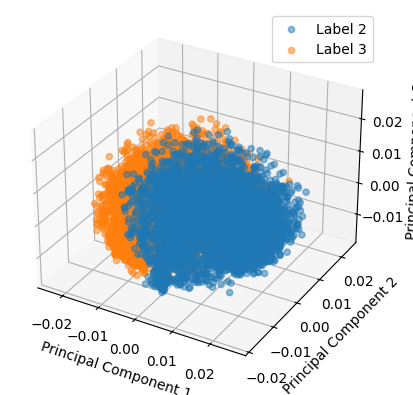

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Filter data points with labels 2 and 3
X_filtered = X_train[np.logical_or(Y_train == 2, Y_train == 3)]
Y_filtered = Y_train[np.logical_or(Y_train == 2, Y_train == 3)]

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_filtered]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_filtered = np.array(Y_filtered)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_flattened)

# Plot the transformed data for labels 2 and 3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Show plot inline in Jupyter Notebook
%matplotlib inline
plt.show()


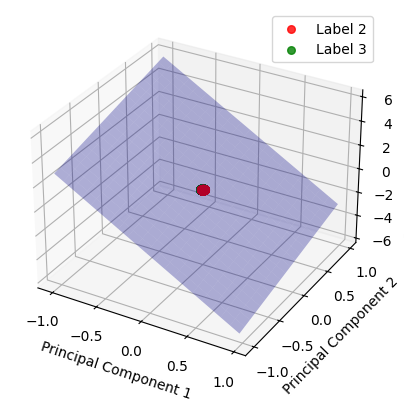

In [34]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Filter data points with labels 2 and 3
X_filtered = X_train[np.logical_or(Y_train == 2, Y_train == 3)]
Y_filtered = Y_train[np.logical_or(Y_train == 2, Y_train == 3)]

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_filtered]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_filtered = np.array(Y_filtered)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_flattened)

# Fit SVM to separate data points with labels 2 and 3
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_pca, Y_filtered)

# Create meshgrid for plotting the hyperplane
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
z_min, z_max = X_train_pca[:, 2].min() - 1, X_train_pca[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]

# Calculate points on the hyperplane
hyperplane_points = np.column_stack((xx.ravel(), yy.ravel(), zz.ravel()))

# Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot hyperplane
ax.plot_surface(xx, yy, zz, color='b', alpha=0.1)

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='r')      # Change color to red

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='g')      # Change color to green

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

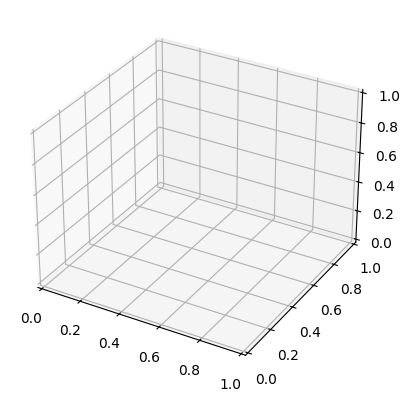

<Figure size 640x480 with 0 Axes>

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot hyperplane
#ax.plot_surface(xx, yy, zz, color='b', alpha=.1)
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, rstride=1, cstride=1,
                   facecolors=cm.jet(N),
                   linewidth=0, antialiased=False, shade=False
)

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='r')      # Change color to red

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='g')      # Change color to green

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


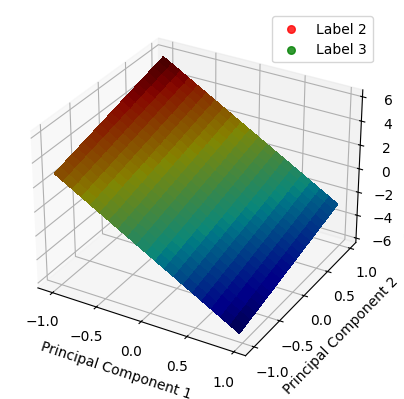

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming you have defined xx, yy, and zz

# Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate colors for the surface
N = 10  # Number of divisions for color mapping
norm = plt.Normalize(zz.min(), zz.max())  # Normalize zz for color mapping
colors = cm.jet(norm(zz))  # Apply colormap to zz

# Plot the surface
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, facecolors=colors, linewidth=0, antialiased=False)

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0], X_train_pca[Y_filtered == 2, 1], X_train_pca[Y_filtered == 2, 2], label='Label 2', alpha=0.8, s=30, c='r')

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0], X_train_pca[Y_filtered == 3, 1], X_train_pca[Y_filtered == 3, 2], label='Label 3', alpha=0.8, s=30, c='g')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()
